In [13]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


pip install matplotlib

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [21]:
pip install scikit-learn

     ---------------------------------------- 10.6/10.6 MB 2.0 MB/s eta 0:00:00
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Note: you may need to restart the kernel to use updated packages.


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   
5   39    1                3           120          339                    0   
6   45    0                2           130          237                    0   
7   54    1                2           110          208                    0   
8   37    1                4           140          207                    0   
9   48    0                2           120          284                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172            

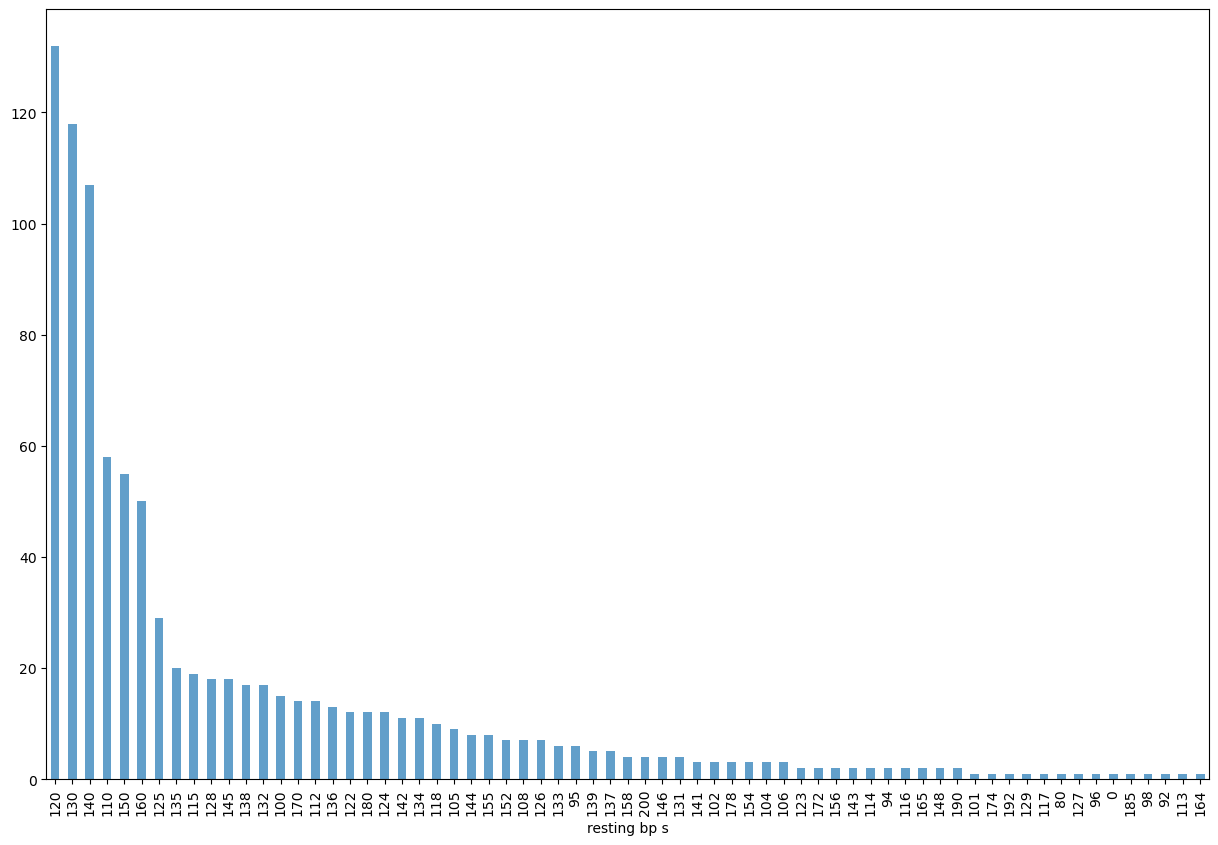

mean squared error = 0.22282608695652173 
accuracy score = 77.72 
None
mean squared error = 0.41304347826086957 
accuracy score = 58.7 
None
mean squared error = 0.23369565217391305 
accuracy score = 76.63 
None
mean squared error = 0.20652173913043478 
accuracy score = 79.35 
None
mean squared error = 0.22282608695652173 
accuracy score = 77.72 
None
mean squared error = 0.1956521739130435 
accuracy score = 80.43 
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>


c:\Users\mibra\anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [22]:
import pandas as pd

data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
# encoding='latin-1'

print(data.head(10))

print(data.isnull().sum())

print(data.info())

data = data.dropna()

data = data.drop_duplicates()

import seaborn as sns
import matplotlib.pyplot as plt

print(data['age'].value_counts())

print(data['sex'].value_counts())

print(data['chest pain type'].value_counts())

data['resting bp s'].value_counts().plot(kind='bar', alpha=0.7, figsize=(15, 10))
plt.show()

#x = data.iloc[:, data.columns != "target"]
x=data[['age','sex','chest pain type','cholesterol', 'fasting blood sugar', 'max heart rate']]
y = data['target']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=42)

from sklearn.preprocessing import StandardScaler

StanderScaler = StandardScaler()
x_train = StanderScaler.fit_transform(x_train)
x_test = StanderScaler.transform(x_test)

from sklearn.metrics import accuracy_score, mean_squared_error

def model(model):
    model_name = model()
    model_name.fit(x_train, y_train)

    print("mean squared error = {} ".format(mean_squared_error(y_test, model_name.predict(x_test))))
    print("accuracy score = {} ".format(round(accuracy_score(y_test, model_name.predict(x_test)) * 100, 2)))

from sklearn.ensemble import RandomForestClassifier
RF_C = model(RandomForestClassifier)
print(RF_C)

import pickle
#saved_model = pickle.dumps(LR)
with open('RF_C.pkl','wb') as files:
    pickle.dump(RF_C, files)

from sklearn.tree import DecisionTreeClassifier
DT_C = model(DecisionTreeClassifier)
print(DT_C)

from sklearn.linear_model import LogisticRegression
LR = model(LogisticRegression)
print(LR)

from sklearn.svm import SVC
SVC = model(SVC)
print(SVC)

from sklearn.linear_model import RidgeClassifier
Risge_C = model(RidgeClassifier)
print(Risge_C)

from sklearn.ensemble import AdaBoostClassifier
Ada_C = model(AdaBoostClassifier)
print(AdaBoostClassifier)

